In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as imbPipeline

In [3]:
#cnfiguration to see all columns
pd.set_option('display.max_columns', None)

In [4]:
# Reading data
data = pd.read_csv('NF-UNSW-NB15.csv')

In [5]:
# Quick analyze
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign


In [6]:
# Exclude label column
X, y = data.drop(columns=['Attack', 'Label']), data['Label']

In [7]:
y.value_counts()

Label
0    1550712
1      72406
Name: count, dtype: int64

In [8]:
# Categorize columns
ip_attrs = ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR']
numeric_attrs = ['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', '00', '01', '02', '03', '10', '11', '12', '13']

In [9]:
# Convert IP addresses into separate columns
for i, attr in enumerate(ip_attrs):
    mapper = {j: f'{i}{j}' for j in range(4)}
    X = pd.concat([X, X[attr].str.split('.', expand=True).rename(columns=mapper).astype(int)], axis=1)

In [10]:
# Drop ip columns
X = X.drop(columns=ip_attrs)

In [11]:
# Preprocessing pipelines
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [12]:
# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numeric_attrs),
    ]
)

In [13]:
# Complete pipeline with SMOTE
clf_pipeline = imbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier())
])

In [14]:
# Creating train and test sets
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test, X_validation, y_test, y_validation = train_test_split(X_, y_, test_size=0.5, random_state=42, stratify=y_)

In [15]:
# Convert labels to numbers
le = LabelEncoder()
y = le.fit_transform(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_validation = le.transform(y_validation)

In [16]:
# # Hyperparameter tuning
# param_grid = {
#     'classifier__n_estimators': [100, 200],
#     'classifier__max_depth': [None, 10, 20]
# }
# grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

/Users/sepehrmasoudizad/Desktop/Newest/proj1/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:59:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sepehrmasoudizad/Desktop/Newest/proj1/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:59:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sepehrmasoudizad/Desktop/Newest/proj1/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:59:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sepehrmasoudizad/Desktop/Newest/proj1/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['L4_SRC_PORT',
                                                                          'L4_DST_PORT',
                                                                          'PROTOCOL',
                                                                          'L7_PROTO',
                                                                          'IN_BYTES',
                                                                          'OUT_BYTES',
                                                                          'IN_PKTS',
                                                                          'OUT_PKTS',
                                                                          'TCP_FLAGS',
                                                                          'FLOW_DURATION_MILLISECONDS',
                                                                          '00',
                                                                          '01',
                                                                          '02',
                                                                          '03',
                                                                          '10',
                                                                          '11',
                                                                          '12',
                                                                          '13'])])),
                                       ('smote', SMOTE(random_stat...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]})

In [17]:
# Evaluate best model
# best_clf = grid_search.best_estimator_
clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_validation)
classification_report(y_validation, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99    155072\n           1       0.74      0.99      0.85      7240\n\n    accuracy                           0.98    162312\n   macro avg       0.87      0.99      0.92    162312\nweighted avg       0.99      0.98      0.98    162312\n'

In [18]:
scores = cross_val_score(clf_pipeline, X, y, cv=5, scoring='recall')
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')

Cross-Validation Accuracy Scores: [0.99150611 0.94344313 0.93150117 0.94088806 0.92928665]
Mean Accuracy: 0.9473250258797892


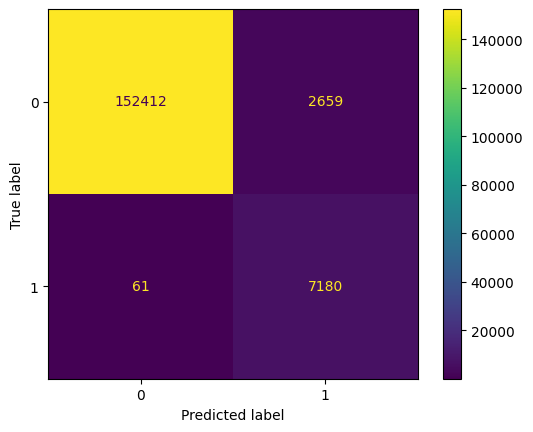

In [22]:
y_pred_on_test = clf_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred_on_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()